# MovieLens Case Study

### DESCRIPTION

#### Background of Problem Statement :

    The GroupLens Research Project is a research group in the Department of Computer Science 
    and Engineering at the University of Minnesota. Members of the GroupLens Research Project 
    are involved in many research projects related to the fields of information filtering, 
    collaborative filtering, and recommender systems. The project is led by professors 
    John Riedl and Joseph Konstan. The project began to explore automated collaborative
    filtering in 1992 but is most well known for its worldwide trial of an automated 
    collaborative filtering system for Usenet news in 1996. Since then the project has expanded
    its scope to research overall information by filtering solutions, integrating into 
    content-based methods, as well as, improving current collaborative filtering technology.

#### Problem Objective :

    Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. 
    You need to find features affecting the ratings of any particular movie and build a 
    model to predict the movie ratings.

#### Domain: Entertainment

#### Analysis Tasks to be performed:

    - Import the three datasets
    - Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age 
    Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables 
    using two primary keys MovieID & UserId)
    - Explore the datasets using visual representations (graphs or tables), also include 
    your comments on the following:
            1) User Age Distribution
            2) User rating of the movie “Toy Story”
            3) Top 25 movies by viewership rating
            4) Find the ratings for all the movies reviewed by for a particular user of 
            user id = 2696
    - Feature Engineering:
        Use column genres:
            1) Find out all the unique genres (Hint: split the data in column genre making 
            a list and then process the data to find out only the unique categories of genres)
            2) Create a separate column for each genre category with a one-hot encoding (1 and 0) 
            whether or not the movie belongs to that genre. 
            3) Determine the features affecting the ratings of any particular movie.
            4) Develop an appropriate model to predict the movie ratings

#### Dataset Description :

    These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made 
    by 6,040 MovieLens users who joined MovieLens in 2000.

#### Ratings.dat
##### Format - UserID::MovieID::Rating::Timestamp

          Field	                Description
        - UserID	    Unique identification for each user
        - MovieID	    Unique identification for each movie
        - Rating	    User rating for each movie
        - Timestamp	    Timestamp generated while adding user review
- UserIDs range between 1 and 6040 
- The MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- A timestamp is represented in seconds since the epoch is returned by time(2)
- Each user has at least 20 ratings
 

#### Users.dat
##### Format -  UserID::Gender::Age::Occupation::Zip-code

          Field	                  Description
        - UserID	     Unique identification for each user
        - Genere	     Category of each movie
        - Age	         User’s age
        - Occupation	 User’s Occupation
        - Zip-code	     Zip Code for the user’s location
        All demographic information is provided voluntarily by the users and is not checked 
        for accuracy. Only users who have provided demographic information are included in this 
        data set.
            - Gender is denoted by an "M" for male and "F" for female
            - Age is chosen from the following ranges:
 
                          Value	         Description
                            1	          "Under 18"
                            18	          "18-24"
                            25	          "25-34"
                            35	          "35-44"
                            45	          "45-49"
                            50	          "50-55"
                            56	          "56+"
 

            - Occupation is chosen from the following choices:

                          Value           Description
                            0	       "other" or not specified
                            1	       "academic/educator"
                            2	       "artist”
                            3	       "clerical/admin"
                            4	       "college/grad student"
                            5	       "customer service"
                            6	       "doctor/health care"
                            7	       "executive/managerial"
                            8	       "farmer"
                            9	       "homemaker"
                            10	       "K-12 student"
                            11	       "lawyer"
                            12	       "programmer"
                            13	       "retired"
                            14	       "sales/marketing"
                            15	       "scientist"
                            16	       "self-employed"
                            17	       "technician/engineer"
                            18	       "tradesman/craftsman"
                            19	       "unemployed"
                            20	       "writer”

#### Movies.dat
##### Format - MovieID::Title::Genres

           Field	     Description
          MovieID	  Unique identification for each movie
          Title	      A title for each movie
          Genres	  Category of each movie
 
    - Titles are identical to titles provided by the IMDB (including year of release)
    - Genres are pipe-separated and are selected from the following genres:
        Action
        Adventure
        Animation
        Children's
        Comedy
        Crime
        Documentary
        Drama
        Fantasy
        Film-Noir
        Horror
        Musical
        Mystery
        Romance
        Sci-Fi
        Thriller
        War
        Western
    - Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
    - Movies are mostly entered by hand, so errors and inconsistencies may exist
 

In [1]:
# Import necessary header files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 

In [2]:
# To ignore warnings
warnings.simplefilter('ignore')
# To display needed number of columns
pd.set_option('display.max_columns',30)

### Analysis Task 1
        - Import the Three Datasets

In [3]:
# Load ratings.dat file
ratings = pd.read_csv("ratings.dat",sep="::",header=None,names=['UserID','MovieID','Rating','Timestamp'])
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
# Load users.dat file
users = pd.read_csv("users.dat",sep="::",header=None,names=['UserID','Gender','Age','Occupation','Zip-code'])
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# Load movies.dat file
movies = pd.read_csv("movies.dat",sep="::",header=None,names=['MovieID','Title','Genres'])
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
# Print shape of all three datasets
print("Rating dataset Shape: ",ratings.shape)
print("Users dataset Shape: ",users.shape)
print("Movies dataset Shape: ",movies.shape)

Rating dataset Shape:  (1000209, 4)
Users dataset Shape:  (6040, 5)
Movies dataset Shape:  (3883, 3)


### Analysis Task 2
        - Create a new dataset [Master_Data] with the following columns:
           MovieID Title UserID Age Gender Occupation Rating.

In [7]:
# Merging two dataset movies and ratings on the key MovieID
movie_ratings = pd.merge(movies,ratings,how='inner',on='MovieID')

In [8]:
# Merging the third dataset users on the key UserID
df_final = pd.merge(movie_ratings,users,how='inner',on='UserID')

In [9]:
# Creating Master data with necessary columns
Master_data = df_final[['MovieID','Title','UserID','Age','Gender','Occupation','Rating']]

In [10]:
# Checking for duplicates
Master_data.duplicated().sum()

0

In [11]:
# Master data information
Master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


### Analysis Task 3
        - Explore the datasets using visual representations (graphs or tables)
            1) User Age Distribution
            2) User rating of the movie “Toy Story”
            3) Top 25 movies by viewership rating
            4) Find the ratings for all the movies reviewed by for a particular 
               user of user id = 2696

#### 1) Age Distribution

In [12]:
# Finding Age distribution
age_dist = Master_data['Age'].value_counts().to_frame()
age_dist.sort_index(inplace=True)
age_dist

,Age
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


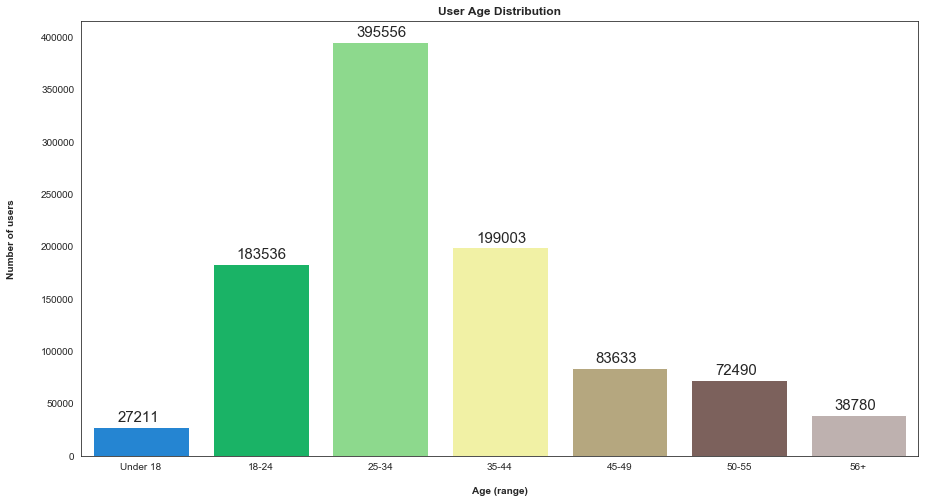

In [13]:
# Visual Representation of the age distribution
plt.figure(figsize=(15,8))
txt = {'weight':'bold'}
sns.set_style("white")
sns.countplot(x='Age',data=Master_data,palette="terrain")
plt.title("User Age Distribution",fontdict=txt)
plt.xlabel("Age (range)",fontdict=txt,labelpad=15)
plt.ylabel("Number of users",fontdict=txt,labelpad=25)
plt.xticks([0,1,2,3,4,5,6],["Under 18","18-24","25-34","35-44","45-49","50-55","56+"],)
for i in range(7):
    plt.annotate(age_dist['Age'].iloc[i],xy=(i-0.2,age_dist['Age'].iloc[i]+5000),size=15)
plt.show()

#### Comments : Most of the users are between the age 25 to 34

#### 2) User Rating for movie Toy Story

In [14]:
# Finding User rating for the movie Toy Story
Toy_stort_df = Master_data[Master_data['Title'] == "Toy Story (1995)"]
TS_rating = Toy_stort_df['Rating'].value_counts().to_frame()
TS_rating

,Rating
4,835
5,820
3,345
2,61
1,16


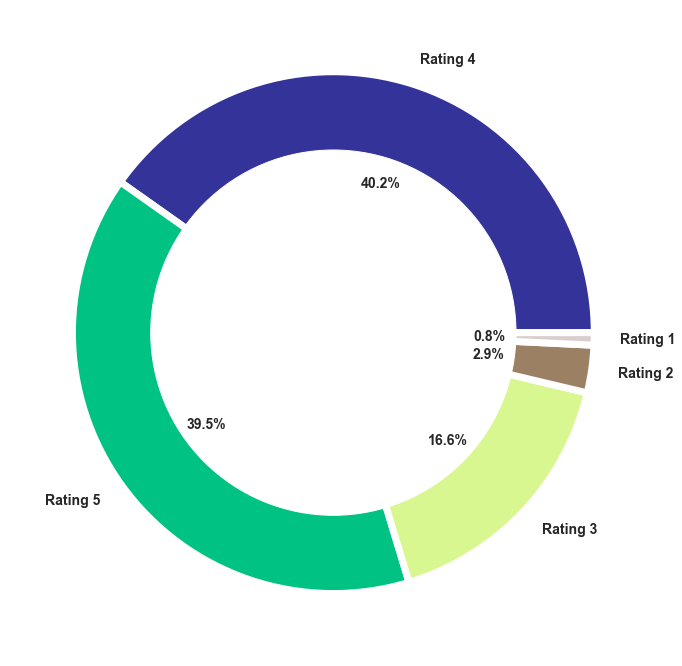

In [15]:
# Visual Representation showing the percentage of each rating for the movie Toy Story
plt.figure(figsize=(12,12))
txt={'weight':'bold','size':14}
cmap = plt.get_cmap('terrain')
colors = cmap(np.arange(5)*59)
labels = ['Rating 4','Rating 5','Rating 3','Rating 2','Rating 1']
plt.pie(TS_rating,labels = labels, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, autopct="%.1f%%", textprops=txt,colors=colors)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
# Finding the avearge overall rating 
print("Average Rating for the movie Toy Story is {:.2f}".format(Toy_stort_df['Rating'].mean()))

Average Rating for the movie Toy Story is 4.15


#### Conclusion : The movie Toy Story was 79.7% rated good (4 and 5) and its average rating is 4.15.

#### 3) Top 25 Movies by Viewership Rating

In [17]:
# Finding top 25 movies based the average viewership ratings
Top25_movies = pd.DataFrame(Master_data.groupby('Title')['Rating'].agg('mean')).sort_values(by='Rating',ascending=False).head(25)
Top25_movies['Title'] = Top25_movies.index
Top25_movies.index = range(1,26)
Top25_movies[['Title','Rating']]

,Title,Rating
1,Ulysses (Ulisse) (1954),5.000000
2,Lured (1947),5.000000
3,Follow the Bitch (1998),5.000000
4,Bittersweet Motel (2000),5.000000
5,Song of Freedom (1936),5.000000
6,One Little Indian (1973),5.000000
7,Smashing Time (1967),5.000000
8,Schlafes Bruder (Brother of Sleep) (1995),5.000000
9,"Gate of Heavenly Peace, The (1995)",5.000000
10,"Baby, The (1973)",5.000000


#### Conclusion : Out of top 25 movies first 10 movies has been rated 5 .

#### 4) User ID = 2696 Rated movies

In [18]:
# Extracting the details of User ID 2696
Userid_2696 = Master_data[Master_data['UserID'] == 2696]
Userid_2696 = Userid_2696.sort_values('Rating',ascending=False,ignore_index=True)
Userid_2696[['MovieID','Title','Rating']]

,MovieID,Title,Rating
0,800,Lone Star (1996),5
1,1645,"Devil's Advocate, The (1997)",4
2,1783,Palmetto (1998),4
3,1092,Basic Instinct (1992),4
4,3176,"Talented Mr. Ripley, The (1999)",4
5,1258,"Shining, The (1980)",4
6,2389,Psycho (1998),4
7,1892,"Perfect Murder, A (1998)",4
8,1617,L.A. Confidential (1997),4
9,1625,"Game, The (1997)",4


#### Comments : This user has rated 5 to the movie titled "Lone Star (1996)" and Most of his ratings are 4 .

### Feature Engineering Task 1
        - Using column 'Genres' , Find out all the unique genres.

In [19]:
# Storing Genres column to a variable names genre
genre = df_final['Genres']
genre.head()

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [20]:
# For loop to store the splitted genre data and append to a list
list1=[]
for row in genre:
    row_list = row.split("|")
    for i in range(len(row_list)):
        list1.append(row_list[i])

In [21]:
# Finding unique genres and number of unique genres
unique_genre = list(set(list1))
print(unique_genre)
print()
print("Total Unique Genres : ",len(unique_genre))

['Film-Noir', 'Sci-Fi', 'Horror', 'Crime', "Children's", 'Thriller', 'Mystery', 'Action', 'War', 'Romance', 'Animation', 'Comedy', 'Drama', 'Musical', 'Documentary', 'Adventure', 'Western', 'Fantasy']

Total Unique Genres :  18


### Feature Engineering Task 2
        - Create a separate column for each genre category with a one-hot encoding ( 1 and 0) 
          whether or not the movie belongs to that genre

In [22]:
# creating a new variable onehotcode to perform onehotencoding
onehotcode = df_final.copy()
onehotcode.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067


In [23]:
# Converting categorical variable to numerical variable
dummy = onehotcode['Genres'].str.get_dummies()    
dummy.head(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
# Merging the final_dataset with newly created onehotcode based on index  
final_dataset = pd.merge(onehotcode,dummy,how='inner',left_index=True,right_index=True)
print("Final dataset shape: ",final_dataset.shape)
final_dataset.head(3)

Final dataset shape:  (1000209, 28)


,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Feature Engineering Task 3
        - Determine the features affecting the ratings of any particular movie.

In [25]:
# Converting categorical column "Gender" into numerical column.
gender_dummy = final_dataset['Gender'].str.get_dummies()

In [26]:
# Merging the new numerical column to final dataset based on index
final_dataset = pd.merge(final_dataset,gender_dummy,how='inner',left_index=True,right_index=True)
final_dataset.head(3)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


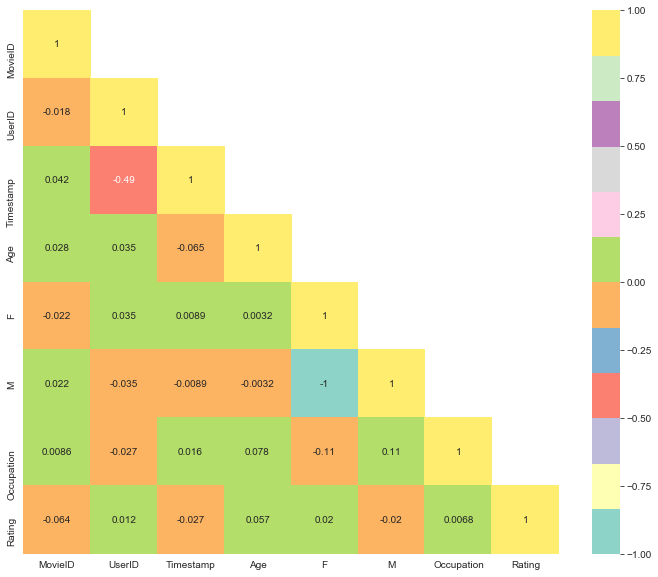

In [27]:
# Creating Heatmap
m = np.ones_like(final_dataset[["MovieID","UserID","Timestamp","Age","F","M","Occupation","Rating"]].corr())
m[np.tril_indices_from(m)]=0
sns.set_style("white")
plt.figure(figsize=(12,10))
sns.heatmap(final_dataset[["MovieID","UserID","Timestamp","Age","F","M","Occupation","Rating"]].corr(),annot=True,cmap="Set3",mask=m)
plt.show()

In [28]:
# Creating a new dataframe with only continous data and dummies
features = final_dataset[['MovieID', 'UserID', 'F', 'M', 'Timestamp',
       'Age', 'Occupation', 'Action', 'Adventure', 'Animation',
       "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western','Rating']]

In [29]:
# Storing features and target variable
x = features.drop(['Rating'],axis=1)
y = features['Rating']

In [30]:
# Feature Selection using SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
# Selecting best 10 features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

     Features         Score
4   Timestamp  1.638876e+08
0     MovieID  3.341344e+06
1      UserID  1.720993e+05
5         Age  1.865494e+04
14      Drama  9.705111e+03
17     Horror  9.192491e+03
23        War  6.405101e+03
16  Film-Noir  3.826022e+03
21     Sci-Fi  1.845628e+03
7      Action  1.734519e+03


In [32]:
# Features selected are stored in a dataframe
feature_selected_df = features[['Timestamp','MovieID','UserID','Age','Drama','Horror','War','Film-Noir','Sci-Fi','Action']]
feature_selected_df

,Timestamp,MovieID,UserID,Age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,978824268,1,1,1,0,0,0,0,0,0
1,978824351,48,1,1,0,0,0,0,0,0
2,978301777,150,1,1,1,0,0,0,0,0
3,978300760,260,1,1,0,0,0,0,1,1
4,978824195,527,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1000204,958489970,3513,5727,25,1,0,0,0,0,0
1000205,958489970,3535,5727,25,0,1,0,0,0,0
1000206,958489902,3536,5727,25,0,0,0,0,0,0
1000207,958490699,3555,5727,25,0,0,0,0,0,1


### Feature Engineering Task 4
        - Develop an appropriate model to predict the movie ratings

In [33]:
# Splitting dataset for training and testing
x_train,x_test,y_train,y_test = train_test_split(feature_selected_df,y,test_size=0.20,random_state=1)

In [34]:
# Size of train and test data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800167, 10), (200042, 10), (800167,), (200042,))

#### Model 1 - Decision Tree

In [35]:
# Object creation
clf = DecisionTreeClassifier()
# Model Fitting
clf = clf.fit(x_train,y_train)
# Prediction of test data
y_pred = clf.predict(x_test)
print("Decision Tree accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Decision Tree accuracy: 0.32


In [36]:
a = pd.DataFrame()
a['y_test'] = y_test
a['y_pred'] = y_pred
a.head(20)

,y_test,y_pred
630120,4,3
229398,5,5
758377,3,4
159240,5,4
254252,4,3
27168,3,3
196538,3,4
37123,3,2
982048,4,3
994502,2,3


#### Model 2 - K-Nearest Neighbours

In [37]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
knnaccuracy = knn.score(x_test, y_test) 
knn_predictions = knn.predict(x_test)   
print("KNN test accuracy: {:.4f}".format(knnaccuracy))
print("KNN train accuracy: {:.4f}".format(knn.score(x_train,y_train)))

KNN test accuracy: 0.3568
KNN train accuracy: 0.5238


#### Model 3 - Gaussian Naive Bayes

In [38]:
gnb = GaussianNB().fit(x_train, y_train) 
gnbaccuracy = gnb.score(x_test, y_test) 
gnb_predictions = gnb.predict(x_test) 
print("GNB test accuracy: {:.4f}".format(gnbaccuracy))
print("GNB train accuracy: {:.4f}".format(gnb.score(x_train,y_train)))

GNB test accuracy: 0.3485
GNB train accuracy: 0.3470


#### Comparing the accuracy score of all three models , K-Nearest Neighbours has higher accuracy than other models